In [1]:
__author__ = 'Peng Jia'
from __future__ import division
import numpy as np
import pandas as pd
import pylab as pl
import os
import json
import geopandas as gp
import urllib2
import statsmodels.api as sm1
import statsmodels.formula.api as sm
%pylab inline
import numpy as np
import csv
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


C:\Users\Peng\Anaconda\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data1 = gp.GeoDataFrame.from_csv("NYPD_Motor_Vehicle_Collisions.csv")

C:\Users\Peng\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (23,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
data1 = data1[~(pd.isnull(data1['ZIP CODE']))]

In [4]:
data11 = (data1['DATE'].groupby(data1['ZIP CODE']).count())

In [5]:
data2 = gp.GeoDataFrame.from_csv("pupulation_nyc.csv")

In [6]:
data3 = pd.concat([data11, data2], join='inner', axis=1)

In [7]:
data3=data3.rename(columns = {'DATE':'Accident_Number'})

In [8]:
data3.rename(columns = {'Accident_Number':'y'}, inplace=True)

In [9]:
data3.columns

Index([u'y', u'Zip Square Footage', u'Total population',
       u'Total population - Male', u'EstimatTotal population - Female',
       u'Population density', u'Population 16 years and over',
       u'Total population - White alone',
       u'Total population - Black or African American alone',
       u'Total population - Asian alone',
       u'Total population - Hispanic or Latino (of any race)',
       u'Under 5 years', u'5 to 9 years', u'10 to 14 years', u'15 to 19 years',
       u'20 to 24 years', u'25 to 34 years', u'35 to 44 years',
       u'45 to 54 years', u'55 to 59 years', u'60 to 64 years',
       u'65 to 74 years', u'75 to 84 years', u'85 years and over',
       u'Total households', u'Mean household income (dollars)',
       u'Median earnings for workers (dollars)', u'Residential Units',
       u'Total units', u'Non-residential units', u'AverageAge'],
      dtype='object')

In [10]:
data3.rename(columns = {u'Population density':'PopulationDensity'}, inplace=True)
mod = sm.ols(formula='y ~ PopulationDensity', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.247
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.266
Time:                        08:56:29   Log-Likelihood:                -1599.3
No. Observations:                 179   AIC:                             3203.
Df Residuals:                     177   BIC:                             3209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept          2827.9755    193.70

In [11]:
data3.rename(columns = {u'Mean household income (dollars)':'MeanHouseholdIncome'}, inplace=True)
mod = sm.ols(formula='y ~ MeanHouseholdIncome', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5221
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.471
Time:                        08:56:29   Log-Likelihood:                -1599.7
No. Observations:                 179   AIC:                             3203.
Df Residuals:                     177   BIC:                             3210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            2803.0680    

In [12]:
data3.rename(columns = {u'Median earnings for workers (dollars)':'MedianEarningsForWorkers'}, inplace=True)
mod = sm.ols(formula='y ~ MedianEarningsForWorkers', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.06357
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.801
Time:                        08:56:29   Log-Likelihood:                -1599.9
No. Observations:                 179   AIC:                             3204.
Df Residuals:                     177   BIC:                             3210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

In [13]:
data3.rename(columns = {u'Total units':'totalUnits'}, inplace=True)
mod = sm.ols(formula='y ~ totalUnits', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.993
Date:                Wed, 16 Dec 2015   Prob (F-statistic):             0.0477
Time:                        08:56:29   Log-Likelihood:                -1191.0
No. Observations:                 134   AIC:                             2386.
Df Residuals:                     132   BIC:                             2392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   2887.2251    296.659      9.732      0.0

In [14]:
data3.rename(columns = {u'Under 5 years':'aless5'}, inplace=True)
data3.rename(columns = {u'5 to 9 years':'a5to9'}, inplace=True)
data3.rename(columns = {u'10 to 14 years':'a10to14'}, inplace=True)
data3.rename(columns = {u'15 to 19 years':'a15to19'}, inplace=True)
data3.rename(columns = {u'20 to 24 years':'a20to24'}, inplace=True)
data3.rename(columns = {u'25 to 34 years':'a25to34'}, inplace=True)
data3.rename(columns = {u'35 to 44 years':'a35to44'}, inplace=True)
data3.rename(columns = {u'45 to 54 years':'a45to54'}, inplace=True)
data3.rename(columns = {u'55 to 59 years':'a55to59'}, inplace=True)
data3.rename(columns = {u'60 to 64 years':'a60to64'}, inplace=True)
data3.rename(columns = {u'65 to 74 years':'a65to74'}, inplace=True)
data3.rename(columns = {u'75 to 84 years':'a75to84'}, inplace=True)
data3.rename(columns = {u'85 years and over':'aover85'}, inplace=True)

In [15]:
mod = sm.ols(formula='y ~ AverageAge', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     7.365
Date:                Wed, 16 Dec 2015   Prob (F-statistic):            0.00731
Time:                        08:56:30   Log-Likelihood:                -1596.3
No. Observations:                 179   AIC:                             3197.
Df Residuals:                     177   BIC:                             3203.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5553.8625    958.201      5.796      0.0

In [16]:
data3.rename(columns = {u'Zip Square Footage':'SquareFootage'}, inplace=True)
mod = sm.ols(formula='y ~ SquareFootage', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7540
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.386
Time:                        08:56:30   Log-Likelihood:                -1599.6
No. Observations:                 179   AIC:                             3203.
Df Residuals:                     177   BIC:                             3210.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2863.4079    192.473     14.877

In [17]:
data3.rename(columns = {u'Residential Units':'ResidentialUnits'}, inplace=True)
mod = sm.ols(formula='y ~ ResidentialUnits', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     3.378
Date:                Wed, 16 Dec 2015   Prob (F-statistic):             0.0683
Time:                        08:56:30   Log-Likelihood:                -1191.3
No. Observations:                 134   AIC:                             2387.
Df Residuals:                     132   BIC:                             2392.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         2936.2599    293.023  

In [18]:
data3.rename(columns = {u'Non-residential units':'NonresidentialUnits'}, inplace=True)
mod = sm.ols(formula='y ~ NonresidentialUnits', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.244
Date:                Wed, 16 Dec 2015   Prob (F-statistic):              0.137
Time:                        08:56:30   Log-Likelihood:                -1191.9
No. Observations:                 134   AIC:                             2388.
Df Residuals:                     132   BIC:                             2394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept            3217.6404    

In [19]:
data3.rename(columns = {u'Population 16 years and over':'Population16YearsAndOver'}, inplace=True)
mod = sm.ols(formula='y ~ Population16YearsAndOver', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     121.6
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           7.30e-22
Time:                        08:56:30   Log-Likelihood:                -1553.1
No. Observations:                 179   AIC:                             3110.
Df Residuals:                     177   BIC:                             3117.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

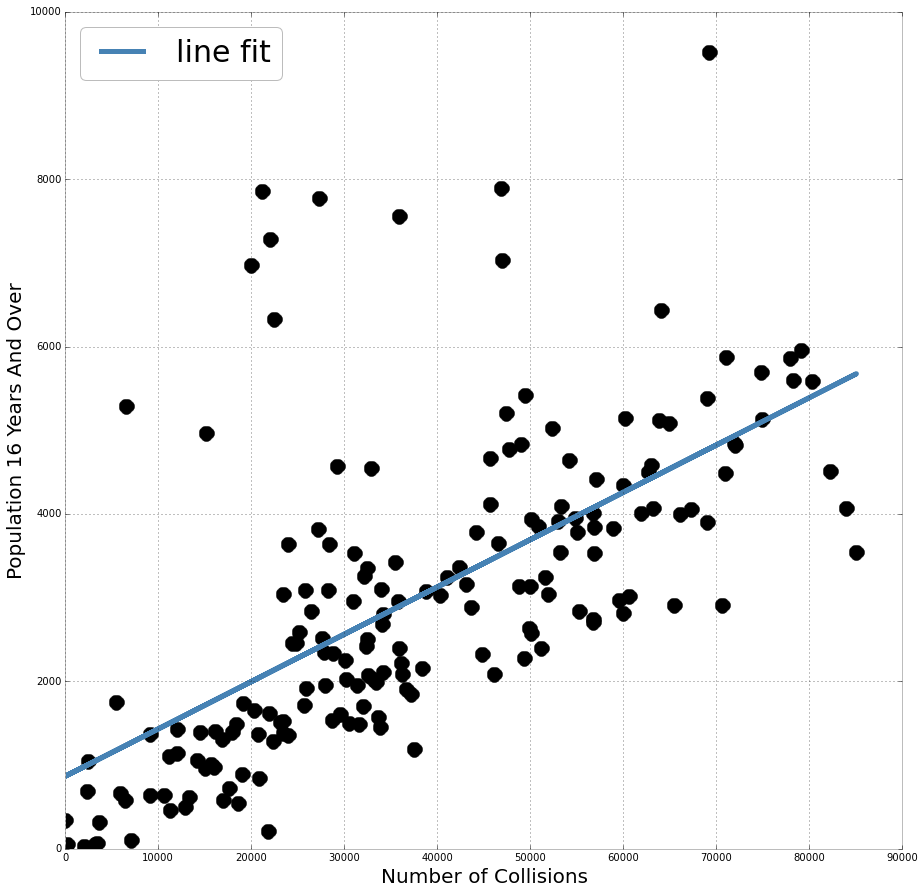

In [20]:
pl.figure(figsize=(15,15))
pl.plot(data3.Population16YearsAndOver, data3.y, 'k.', markersize=30)
pl.plot(data3.Population16YearsAndOver[data3.y.notnull() & data3.Population16YearsAndOver.notnull() ], 
        res.predict(), lw = 5, label="line fit")
pl.xlabel("Number of Collisions", fontsize=20)
pl.ylabel("Population 16 Years And Over", fontsize=20)
pl.legend(fontsize=30, loc=2)

In [21]:
data3.rename(columns = {u'Total population':'TotalPopulation'}, inplace=True)
mod = sm.ols(formula='y ~ TotalPopulation', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     110.1
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           2.49e-20
Time:                        08:56:30   Log-Likelihood:                -1556.7
No. Observations:                 179   AIC:                             3117.
Df Residuals:                     177   BIC:                             3124.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         990.9098    218.570     

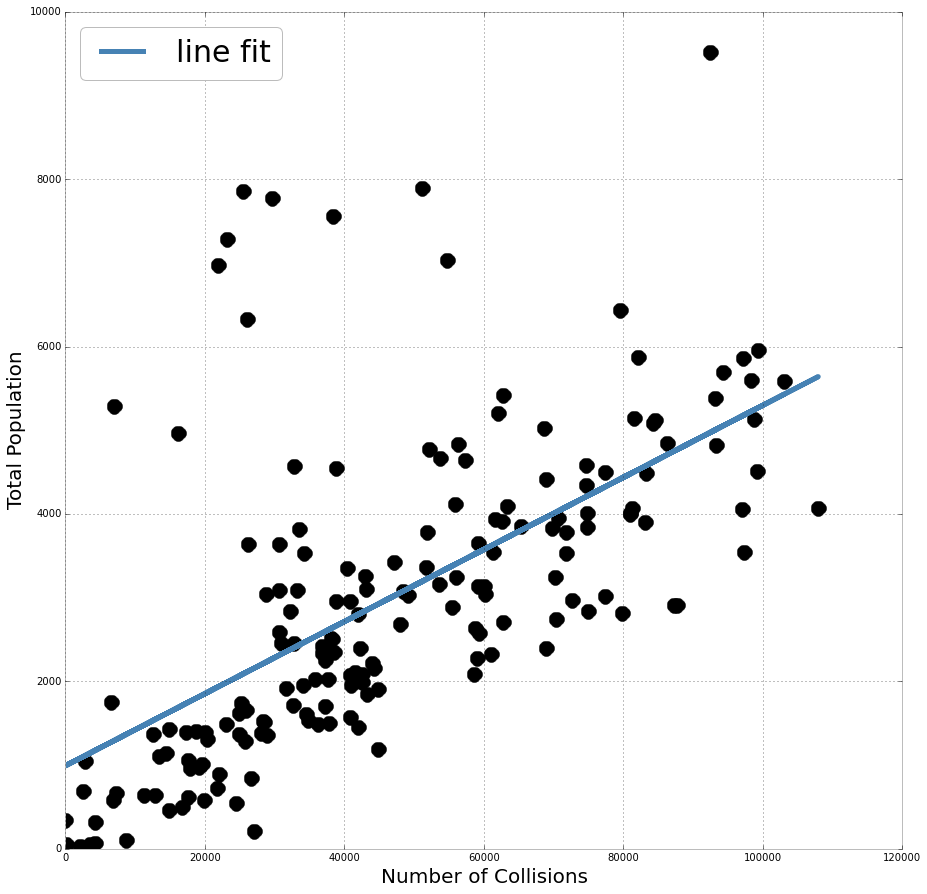

In [22]:
pl.figure(figsize=(15,15))
pl.plot(data3.TotalPopulation, data3.y, 'k.', markersize=30)
pl.plot(data3.TotalPopulation[data3.y.notnull() & data3.TotalPopulation.notnull() ], 
        res.predict(), lw = 5, label="line fit")
pl.xlabel("Number of Collisions", fontsize=20)
pl.ylabel("Total Population", fontsize=20)
pl.legend(fontsize=30, loc=2)

In [23]:
data3.rename(columns = {u'Total households':'TotalHouseholds'}, inplace=True)
mod = sm.ols(formula='y ~ TotalHouseholds', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           3.75e-25
Time:                        08:56:31   Log-Likelihood:                -1545.5
No. Observations:                 179   AIC:                             3095.
Df Residuals:                     177   BIC:                             3101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         731.0329    211.158     

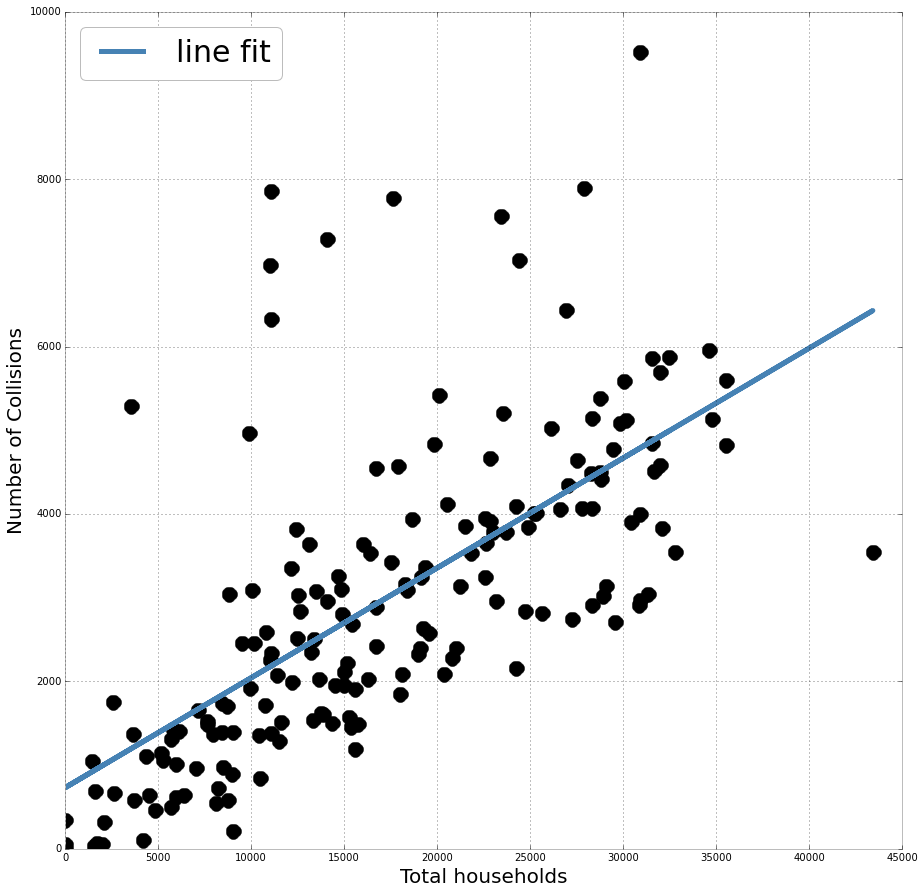

In [24]:
pl.figure(figsize=(15,15))
pl.plot(data3.TotalHouseholds, data3.y, 'k.', markersize=30)
pl.plot(data3.TotalHouseholds[data3.y.notnull() & data3.TotalHouseholds.notnull() ], 
        res.predict(), lw = 5, label="line fit")
pl.ylabel("Number of Collisions", fontsize=20)
pl.xlabel("Total households", fontsize=20)
pl.legend(fontsize=30, loc=2)

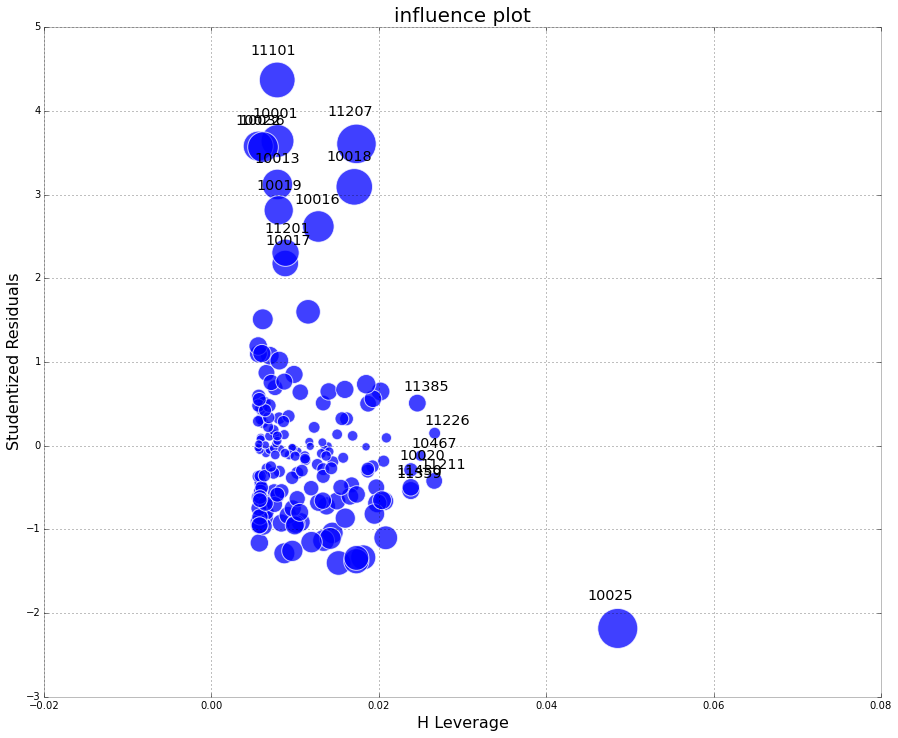

In [26]:
fig = pl.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)
sm1.graphics.influence_plot(res, ax=ax1,criterion="cooks", size=40)
ax1.set_title("influence plot", fontsize=20)

In [27]:
data3=data3[data3.TotalHouseholds<40000]

In [28]:
mod = sm.ols(formula='y ~ TotalHouseholds', data=data3)
res = mod.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 16 Dec 2015   Prob (F-statistic):           5.01e-26
Time:                        08:56:32   Log-Likelihood:                -1535.0
No. Observations:                 178   AIC:                             3074.
Df Residuals:                     176   BIC:                             3080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         663.1311    211.249     

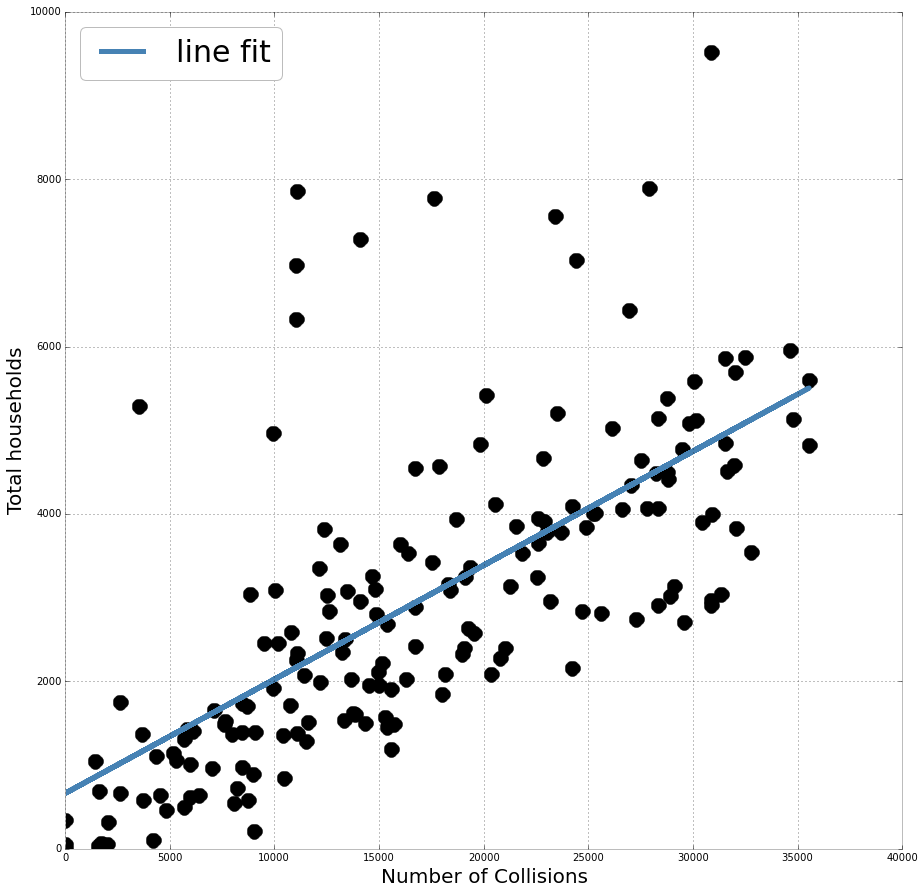

In [29]:
pl.figure(figsize=(15,15))
pl.plot(data3.TotalHouseholds, data3.y, 'k.', markersize=30)
pl.plot(data3.TotalHouseholds[data3.y.notnull() & data3.TotalHouseholds.notnull() ], 
        res.predict(), lw = 5, label="line fit")
pl.xlabel("Number of Collisions", fontsize=20)
pl.ylabel("Total households", fontsize=20)
pl.legend(fontsize=30, loc=2)